In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


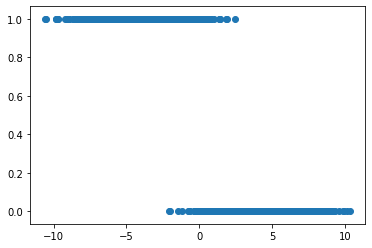

In [11]:
x1=np.random.normal(4,2,1000)
x2=np.random.normal(-4,2,1000)
xs=np.append(x1,x2)
y=np.asarray([0.]*len(x1)+[1.]*len(x2))
plt.scatter(xs,y)
plt.show()

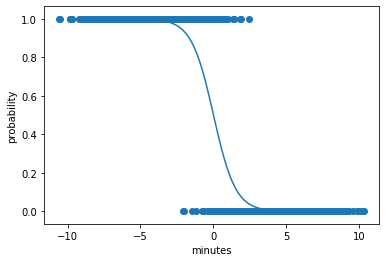

In [16]:
def sigmoid(x):
    return 1./(1.+ np.exp(-x))

learning_rate=.01
training_epoch=1000

plt.scatter(xs,y)

X=tf.placeholder(tf.float32,shape=(None,),name="x")
Y=tf.placeholder(tf.float32,shape=(None,),name="y")

w=tf.Variable([0.,0.],name="parameter",trainable=True)
y_model=tf.sigmoid(w[1]*X+w[0])

cost=tf.reduce_mean(-Y*tf.log(y_model)-(1-Y)*tf.log(1-y_model))

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()

init=tf.global_variables_initializer()

sess.run(init)
prev_error=0

for epoch in range(training_epoch):
    err,_=sess.run([cost,train_op],{X:xs,Y:y})
    #print(epoch,err)
    if(abs(0-err))<0.0001:
        break
    
w_val=sess.run(w,{X:xs,Y:y})

all_xs=np.linspace(-10,10,100)
plt.xlabel("minutes")
plt.ylabel("probability")
plt.plot(all_xs,sigmoid((all_xs*w_val[1]+w_val[0])))
plt.show()
    